In [4]:
import pandas as pd 

In [5]:
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)

data.columns = [
    "Sample code",
    "Clump Thickness",
    "Uniformity of Cell Size",
    "Uniformity of Cell Shape",
    "Marginal Adhesion",
    "Single Epithelial Cell Size",
    "Bare Nuclei",
    "Bland Chromatin",
    "Normal Nucleoli",
    "Mitoses",
    "Class"
]

data=data.drop(['Sample code'],axis=1)
print('Number of instances= %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances= 699
Number of attributes = 10


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [7]:
import numpy as np

data=data.replace('?', np.nan)
print('Number of instances= %d' % (data.shape[0]))
print('Number of instances= %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t %s:%d' % (col,data[col].isna().sum()))

Number of instances= 699
Number of instances= 10
Number of missing values:
	 Clump Thickness:0
	 Uniformity of Cell Size:0
	 Uniformity of Cell Shape:0
	 Marginal Adhesion:0
	 Single Epithelial Cell Size:0
	 Bare Nuclei:16
	 Bland Chromatin:0
	 Normal Nucleoli:0
	 Mitoses:0
	 Class:0


In [8]:
data['Bare Nuclei']=pd.to_numeric(data['Bare Nuclei'], errors='coerce')
data2 = data['Bare Nuclei']
print('Before replacing missing values:')
print(data2[20:25])
data2= data2.fillna(data2.median())

print('\n after replacing missing values:')
print(data2[20:25])

Before replacing missing values:
20    10.0
21     7.0
22     1.0
23     NaN
24     1.0
Name: Bare Nuclei, dtype: float64

 after replacing missing values:
20    10.0
21     7.0
22     1.0
23     1.0
24     1.0
Name: Bare Nuclei, dtype: float64


In [9]:
print('Number of rows in original data =%d' % (data.shape[0]))
data2=data.dropna()
print('Number of rows after discarding missing values=%d' % (data2.shape[0]))

Number of rows in original data =699
Number of rows after discarding missing values=683


In [10]:
%matplotlib inline
data2=data.drop(['Class'],axis=1)
data2['Bare Nuclei']=pd.to_numeric(data2['Bare Nuclei'])
data2.boxplot(figsize=(20,3))

<Axes: >

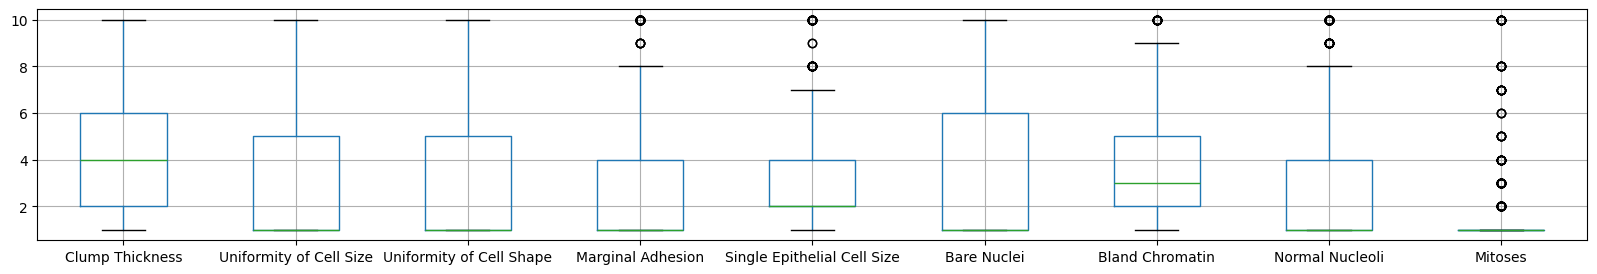

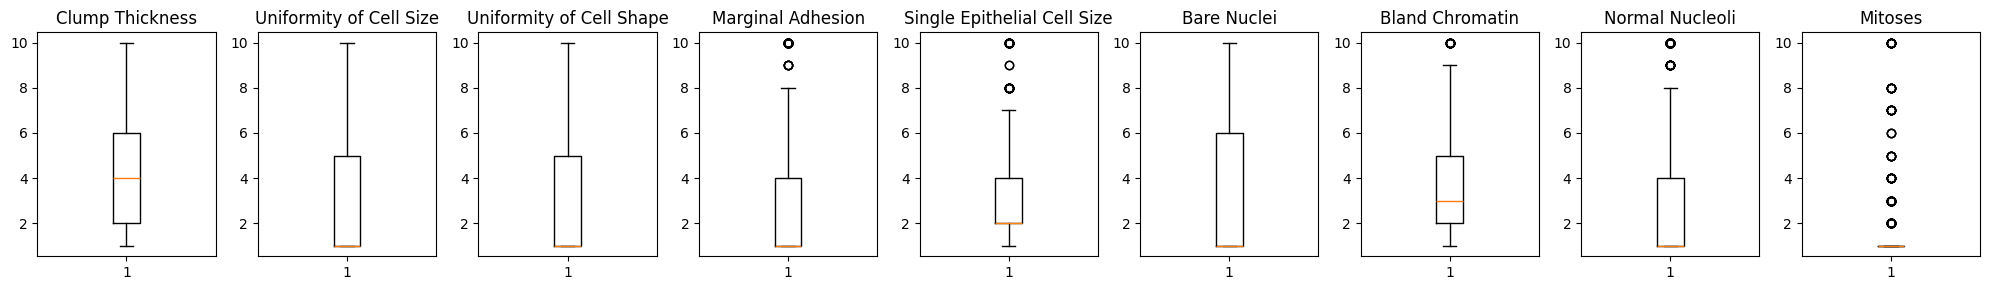

In [11]:
import matplotlib.pyplot as plt


data2 = data.drop(['Class'], axis=1)
data2['Bare Nuclei'] = pd.to_numeric(data2['Bare Nuclei'])


plt.figure(figsize=(20, 3))

for i, column in enumerate(data2.columns, 1):
    plt.subplot(1, len(data2.columns), i)
    plt.boxplot(data2[column].dropna(), vert=True)  
    plt.title(column)

plt.tight_layout()
plt.show()

In [14]:
!pip install seaborn

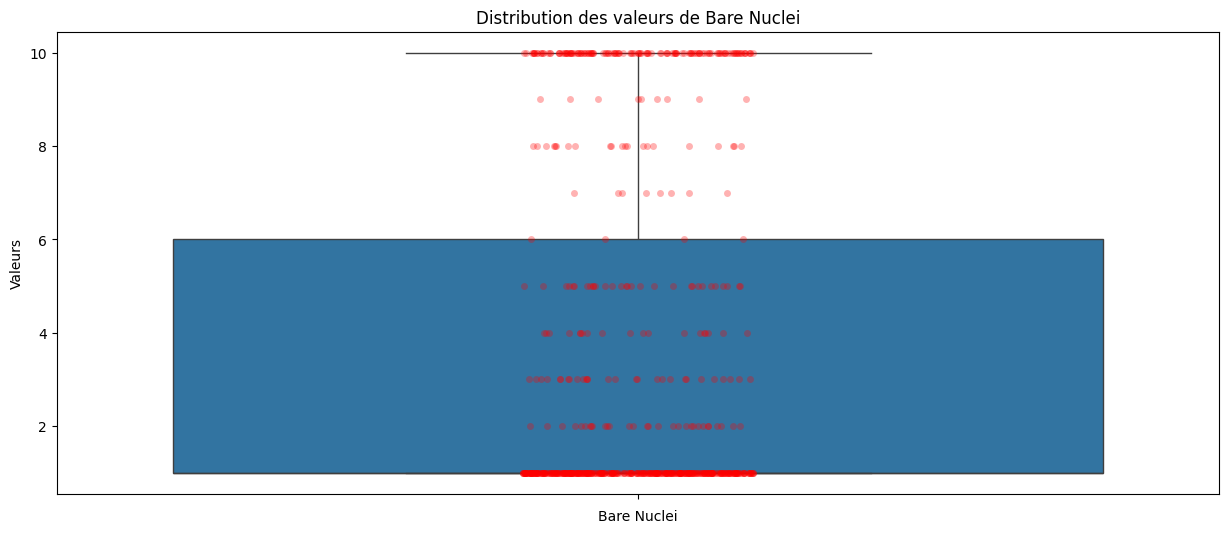


Statistiques descriptives :
count    683.000000
mean       3.544656
std        3.643857
min        1.000000
25%        1.000000
50%        1.000000
75%        6.000000
max       10.000000
Name: Bare Nuclei, dtype: float64


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration de la figure
plt.figure(figsize=(15,6))

# Création du boxplot
sns.boxplot(data=data2['Bare Nuclei'])

# Personnalisation
plt.title('Distribution des valeurs de Bare Nuclei')
plt.xlabel('Bare Nuclei')
plt.ylabel('Valeurs')

# Affichage des points aberrants
sns.stripplot(data=data2['Bare Nuclei'], color='red', alpha=0.3)

plt.show()

# Statistiques descriptives
print("\nStatistiques descriptives :")
print(data2['Bare Nuclei'].describe())

In [14]:
Z=(data2-data2.mean())/data2.std()
Z[20:25]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
20,0.917080,-0.044070,-0.406284,2.519152,0.805662,1.771569,0.640688,0.371049,1.405526
21,1.982519,0.611354,0.603167,0.067638,1.257272,0.948266,1.460910,2.335921,-0.343666
22,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.589645,-0.611387,-0.343666
23,1.272227,0.283642,0.603167,-0.632794,-0.549168,NaN,1.460910,0.043570,-0.343666
24,-1.213798,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.179534,-0.611387,-0.343666


In [15]:
print('Nombre de lignes avant de supprimer les valeurs aberrantes= %d' % (Z.shape[0]))
Z2=Z.loc[((Z>-3).sum(axis=1)==9) & ((Z<=3).sum(axis=1)==9),:]
print('Le nombre de lignes après avoir supprimé les valeurs manquantes =%d' % (Z2.shape[0]))

Nombre de lignes avant de supprimer les valeurs aberrantes= 699
Le nombre de lignes après avoir supprimé les valeurs manquantes =632


In [17]:
dups=data.duplicated()
print('Number of duplicate rows= %d' % (dups.sum()))
data.loc[11:28]

Number of duplicate rows= 236


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
11,2,1,1,1,2,1.0,2,1,1,2
12,5,3,3,3,2,3.0,4,4,1,4
13,1,1,1,1,2,3.0,3,1,1,2
14,8,7,5,10,7,9.0,5,5,4,4
15,7,4,6,4,6,1.0,4,3,1,4
16,4,1,1,1,2,1.0,2,1,1,2
17,4,1,1,1,2,1.0,3,1,1,2
18,10,7,7,6,4,10.0,4,1,2,4
19,6,1,1,1,2,1.0,3,1,1,2
20,7,3,2,10,5,10.0,5,4,4,4


In [19]:
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data2=data.drop_duplicates()
print('Number of rows after discarding duplicates= %d' % (data2.shape[0]))

Number of rows before discarding duplicates = 699
Number of rows after discarding duplicates= 463


In [ ]:
daily=pd.read_csv('DTW_prec.csv',header='infer')